In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
l1 = [0.935, 0.989, 1.132, 0.687, 0.648, 1.408, 1.083, 0.816, 0.902, 1.035, 1.429, 1.034, 1.229, 1.333, 1.144, 1.022,0.907, 0.839, 1.208, 1.271]
l2 = [0.713, 1.067, 1.133, 0.739, 1.014, 1.402, 0.904, 1.079, 1.047, 0.865, 0.966, 1.02,1.127, 1.4, 1.061, 1.664, 1.048, 0.698, 1.328, 1.348]
l3 = [1.078, 1.118, 1.609, 1.167, 0.702, 1.09, 1.046, 1.177, 1.181, 0.831, 1.461, 1.207, 1.032, 1.434, 1.331, 1.104, 1.43, 1.222, 1.53, 1.069]
l4 = [0.981, 1.058, 1.063, 0.99, 0.992, 1.094, 1.056, 1.154, 1.083, 0.998, 0.999, 0.947, 1.137, 1.094, 1.079, 1.081, 1.071, 1.08, 1.04, 1.001]
l5 = [0.992, 1.042, 1.456, 1.437, 1.532, 0.805, 0.872, 1.056, 1.161, 2.056, 1.445, 0.79, 1.164, 0.988, 0.933, 0.815, 0.953, 1.029, 0.954, 0.957]

data = np.array([l1, l2, l3, l4, l5])

In [3]:
dataDF = pd.DataFrame(data)
dataDF = dataDF.T

In [4]:
data_feature_names = ['actif1', 'actif2', 'actif3', 'actif4', 'actif5']

In [5]:
# Add column names
dataDF.columns = data_feature_names
dataDF.head()

,actif1,actif2,actif3,actif4,actif5
0,0.935,0.713,1.078,0.981,0.992
1,0.989,1.067,1.118,1.058,1.042
2,1.132,1.133,1.609,1.063,1.456
3,0.687,0.739,1.167,0.990,1.437
4,0.648,1.014,0.702,0.992,1.532


<AxesSubplot:>

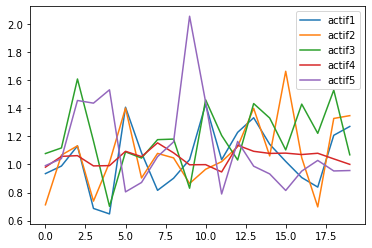

In [6]:
dataDF.plot()

<AxesSubplot:>

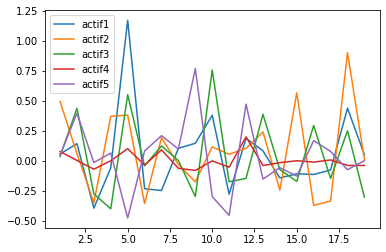

In [7]:
returns = dataDF.pct_change() # [l(i+1)/l(i)]-1
mean_returns = returns.mean()
cov_matrix = returns.cov()
returns.plot() # voir la difference entre les graphiques

In [8]:
cov_matrix # matrice variance covariance des rendements 

,actif1,actif2,actif3,actif4,actif5
actif1,0.119261,0.056436,0.065179,0.008300,-0.024120
actif2,0.056436,0.124302,0.025669,0.006872,-0.030852
actif3,0.065179,0.025669,0.104283,0.004328,-0.032027
actif4,0.008300,0.006872,0.004328,0.004920,0.001771
actif5,-0.024120,-0.030852,-0.032027,0.001771,0.089754


In [9]:
# calcul de la moyenne de chaque actif (asset en anglais)
#m1 = dataDF['actif1'].mean() m2 = dataDF['actif2'].mean() m3 = dataDF['actif3'].mean()
#m4 = dataDF['actif4'].mean() m5 = dataDF['actif5'].mean()

# calcul de la variance de chaque actif 
#v1 = dataDF['actif1'].var()  v2 = dataDF['actif2'].var() v3 = dataDF['actif3'].var()
#v4 = dataDF['actif4'].var()  v5 = dataDF['actif5'].var()

In [10]:
#p_rndmoy = (1/5)*(m1+m2+m3+m4+m5) # rendement moyen du portefeuille


In [11]:
#mcov = dataDF.cov() # matrice variance covariance du portefeuille with pandas


In [12]:
#covMatrix = np.cov(data,bias=True) # with numpy
#print (covMatrix)

In [13]:
# Assign weights to the asets. sum of Weights must = 1 so 0.2 for each aset. 
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) # portefeuille initial ie on prend la même proportion de chaque actif : 20 %
weights 


array([0.2, 0.2, 0.2, 0.2, 0.2])

In [14]:
weights.shape

(5,)

In [15]:
varPortf = np.dot(weights,cov_matrix)
varPortf = np.dot(varPortf, weights.T)
varPortf


0.024225174098119716

In [16]:
rendMoyP = np.mean(mean_returns)
rendMoyP

0.04684702465250476

In [17]:
ecartType = pow(varPortf,0.5)
ecartType


0.1556443834454675

Donc le portefeuille initial a un rendement moyen de 4.68 % et une variance de 2.42 % et un std de 15.5 %


Random Portfolios Generation

We have 5 assets in our portfolio. One decision we have to make is how we should allocate our budget to each of stock in our portfolio. If our total budget is 1, then we can decide the weights for each asset, so that the sum of weights will be 1. And the value for weights will be the portion of budget we allocate to a specific asset

Let’s define some functions to simulate random weights to each stock in the portfolio, then calculate the portfolio’s overall annualised returns and annualised volatility.

“portfolio_annualised_performance” function will calculate the returns and volatility, and to make it as an annualised calculation I take into account 252 as the number of trading days in one year. “random_portfolios” function will generate portfolios with random weights assigned to each asset, and by giving num_portfolios argument, you can decide how many random portfolios you want to generate.

From the above code block, there are two things I want to point out.
Portfolio standard deviation

The first is the calculation for portfolio’s volatility in “portfolio_annualised_performance” function. If you look up “portfolio standard deviation formula”, you will come across formulas as below.


In [18]:
returns = dataDF.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0178



In [19]:
returns

,actif1,actif2,actif3,actif4,actif5
0,NaN,NaN,NaN,NaN,NaN
1,0.057754,0.496494,0.037106,0.078491,0.050403
2,0.144590,0.061856,0.439177,0.004726,0.397313
3,-0.393110,-0.347749,-0.274705,-0.068674,-0.013049
4,-0.056769,0.372124,-0.398458,0.002020,0.066110
5,1.172840,0.382643,0.552707,0.102823,-0.474543
6,-0.230824,-0.355207,-0.040367,-0.034735,0.083230
7,-0.246537,0.193584,0.125239,0.092803,0.211009
8,0.105392,-0.029657,0.003398,-0.061525,0.099432
9,0.147450,-0.173830,-0.296359,-0.078486,0.770887


In [20]:
returns.drop([0,4], inplace=True) # supprimer la 1 ère ligne qui contient NaN

In [22]:
returns

,actif1,actif2,actif3,actif4,actif5
1,0.057754,0.496494,0.037106,0.078491,0.050403
2,0.144590,0.061856,0.439177,0.004726,0.397313
3,-0.393110,-0.347749,-0.274705,-0.068674,-0.013049
5,1.172840,0.382643,0.552707,0.102823,-0.474543
6,-0.230824,-0.355207,-0.040367,-0.034735,0.083230
7,-0.246537,0.193584,0.125239,0.092803,0.211009
8,0.105392,-0.029657,0.003398,-0.061525,0.099432
9,0.147450,-0.173830,-0.296359,-0.078486,0.770887
10,0.380676,0.116763,0.758123,0.001002,-0.297179
11,-0.276417,0.055901,-0.173854,-0.052052,-0.453287


In [23]:
# Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [24]:
assets =  ['actif1', 'actif2', 'actif3', 'actif4', 'actif5']

In [25]:
# Assign weights to the stocks. Weights must = 1 so 0.2 for each (ie 20 %)
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

To show the annualized co-variance matrix we must multiply the co-variance matrix by the number of trading days for the current year. In this case the number of trading days will be 252 for this year. c'est le nombre de jours qu'on utilise, mais tu peux le changer. 

In [26]:
cov_matrix_annual = returns.cov() * 252 
cov_matrix_annual

,actif1,actif2,actif3,actif4,actif5
actif1,31.609460,15.577337,16.585046,2.212269,-6.388172
actif2,15.577337,31.897902,8.820321,1.839040,-8.348368
actif3,16.585046,8.820321,24.762881,1.146139,-8.364823
actif4,2.212269,1.839040,1.146139,1.312720,0.473007
actif5,-6.388172,-8.348368,-8.364823,0.473007,23.937862


Now calculate and show the portfolio variance using the formula :
Expected portfolio variance= W.T * (Covariance Matrix) * W

In [27]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

6.424976693755895

Now calculate and show the portfolio volatility using the formula :
Expected portfolio volatility= SQRT (W.T * (Covariance Matrix) * W)


Don’t forget the volatility (standard deviation) is just the square root of the variance.


In [28]:
port_volatility = np.sqrt(port_variance)
port_volatility

2.5347537737926134

In [29]:
#Last but least not I’m going to show and calculate the portfolio annual simple return.
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights)*252
portfolioSimpleAnnualReturn


12.503228748142606

In [31]:
#Show the expected annual return, volatility or risk, and variance.
percent_var = str(round(port_variance, 2) ) + '%'
percent_vols = str(round(port_volatility, 2) ) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2))+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)


Expected annual return : 12.5%
Annual volatility/standard deviation/risk : 2.53%
Annual variance : 6.42%


Optimize The Portfolio

It’s now time to optimize this portfolio, meaning I want to optimize for the maximum return with the least amount of risk .

In [32]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

ModuleNotFoundError: No module named 'pypfopt'

In [ ]:
#Calculate the expected returns and the annualised sample covariance matrix of daily asset returns.

mu = expected_returns.mean_historical_return(df)#returns.mean() * 252
S = risk_models.sample_cov(df) #Get the sample covariance matrix

In [ ]:
#Optimize for maximal Sharpe ration .
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

I want to get the discrete allocation of each share of the stock, meaning I want to know exactly how many of each stock I should buy given some amount that I am willing to put into this portfolio.
So, for example I am willing to put in $15,000 USD into this portfolio, and need to know how much of each stock I can purchase in the portfolio to give me the optimal results.

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))
